# Radial Basis Function Neural Network

In [23]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

class RBFnn:
    def __init__(self, input_size, neuron_num, output_size):
        self.L = output_size
        self.N = input_size
        self.M = neuron_num
        self.mu = np.ones([input_size, neuron_num])
        self.sigma = np.ones([input_size, neuron_num])
        self.W = np.ones([neuron_num, output_size])
        self.bias = np.zeros([1, output_size])
    def center_init(self, x):
        kmeans = KMeans(n_clusters=self.M, random_state=0, n_init="auto").fit(x)
        self.mu = kmeans.cluster_centers_.T
    def forward(self, x):
        phi = np.exp(-((np.expand_dims(x,-1)-np.expand_dims(self.mu,0))/np.expand_dims(self.sigma,0))**2)
        phi = phi.prod(1)
        self.phi = phi
        y_hat = phi @ self.W + self.bias
        return(y_hat)
    def grad(self, x, y):
        
        # Forward
        y_hat = self.forward(x)
        # grad
        error = (np.expand_dims(self.W, 0)*np.expand_dims(y_hat - y, 1)).sum(-1) # sample * neuron_num
        grad_mu = (np.expand_dims(self.phi,1)*(np.expand_dims(x,-1)-np.expand_dims(self.mu,0))/np.expand_dims(self.sigma,0)**2)*np.expand_dims(error, 1)
        grad_mu = grad_mu.mean(0)

        grad_sigma = (np.expand_dims(self.phi,1)*(np.expand_dims(x,-1)-np.expand_dims(self.mu,0))**2/np.expand_dims(self.sigma,0)**3)*np.expand_dims(error, 1)
        grad_sigma = grad_sigma.mean(0)

        grad_bias = (y_hat - y).mean(-1).mean(0)
        return(grad_mu, grad_sigma, grad_bias)
    def Train(self, x, y, iteration_num = 1000, learning_rate = 0.01):
        self.center_init(x)
        for i in range(iteration_num):
            grad_mu, grad_sigma, grad_bias = self.grad(x, y)
            self.mu -= learning_rate * grad_mu
            self.sigma -= learning_rate * grad_sigma
            self.bias -= learning_rate * grad_bias
            self.forward(x)
            self.W = np.linalg.pinv(self.phi)@(y-self.bias)

# Example 1

In [24]:
Num_samples = 100
X = np.random.uniform(0,1,Num_samples)
X = np.sort(X, axis=0).reshape([-1,1])
noise = np.random.uniform(-0.1, 0.1, Num_samples).reshape([-1,1])
y = np.sin(2*np.pi * X) + noise

In [25]:
model = RBFnn(X.shape[1], 5, y.shape[1])
model.Train(X, y, 1000, 0.01)
y_hat = model.forward(X)

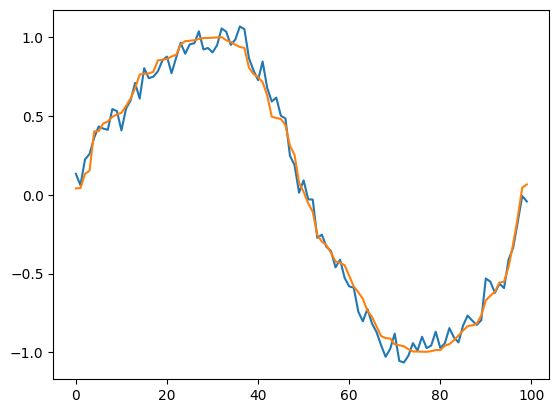

In [26]:
plt.plot(y)
plt.plot(y_hat)

# Example 2

In [27]:
t = np.linspace(0, 2*np.pi, 1000)
x = np.array([np.sin(t)**2, np.cos(t)**3, np.sin(-t)**3]).T
y = np.array([np.sin(-t), np.cos(t)**7]).T

In [28]:
model = RBFnn(x.shape[1], 13, y.shape[1])
model.Train(x, y, 1000, 0.01)
y_hat = model.forward(x)

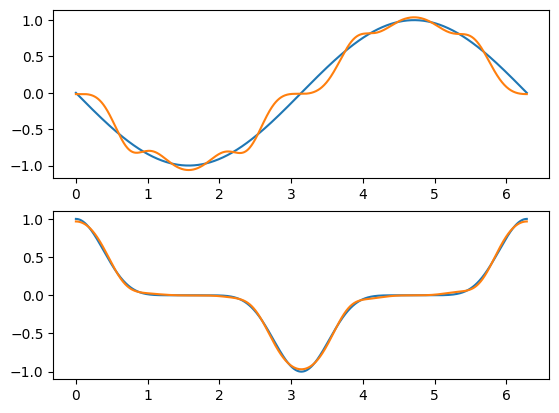

In [29]:
plt.subplot(2,1,1)
plt.plot(t, y[:,0])
plt.plot(t, y_hat[:,0])
plt.subplot(2,1,2)
plt.plot(t, y[:,1])
plt.plot(t, y_hat[:,1])

In [1]:
'.'

'.'